# Chi-Squared Tests

In this lesson, we'll learn about the chi-squared test for categorical data. This test allows us to find the statistical significance of observing a set of categorical values.

We'll work with data on U.S. income and demographics throughout this lesson.

- We'll work with data on U.S. income and demographics throughout this lesson. Each row represents a single person who was counted in the 1990 US Census and contains information about their income and demographics. 


- The entire dataset has <font color='red'>32,561</font> rows, and is a sample of the full census. Of the rows, <font color='red'>10,771</font> are Female, and <font color='red'>21,790</font> are Male. These numbers may seem incorrect, because the full census shows that the U.S. is about <font color='red'>50%</font> Male and <font color='red'>50%</font> Female. Therefore, our expected values for number of Males and Females would be <font color='red'>16,280.5</font> each.


We know that the numbers may seem incorrect, but we don't quite know how to find the numerical value for the observed and expected values. We also can't determine if there's a statistically significant difference between the two groups, and if we need to examine further.


<font color='blue'>This is where a chi-squared test can help. The chi-squared test enables us to **quantify the difference between sets of observed and expected categorical values**. </font>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
print(sys.version)
pd.options.display.max_columns

3.8.12 (default, Oct 12 2021, 06:23:56) 
[Clang 10.0.0 ]


20

On the last screen, our observed values were 10771 Females, and 21790 Males. Our expected values were 16280.5 Females and 16280.5 Males.

- Compute the proportional difference in number of observed Females vs number of expected Females. Assign the result to female_diff.


- Compute the proportional difference in number of observed Males vs number of expected Males. Assign the result to male_diff.


In [4]:
df=pd.read_csv('Datasets/income.csv')
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
n_males = df['sex'].value_counts(dropna=False)[0]
n_females = df['sex'].value_counts(dropna=False)[1]

exp_males = 16280.5
exp_females = 16280.5

female_diff = (n_females - exp_females)/exp_females
male_diff = (n_males - exp_males)/exp_males

print(f'''Observed females in survey are {n_females}, 
expected females are{exp_females}, 
proportional difference are {female_diff}''' )
print('\n')
print(f'''Observed males in survey are {n_males}, 
expected males are{exp_males}, 
proportional difference are {male_diff}''' )



Observed females in survey are 10771, 
expected females are16280.5, 
proportional difference are -0.33841098246368356


Observed males in survey are 21790, 
expected males are16280.5, 
proportional difference are 0.33841098246368356


On the last screen, we got -0.338 for the Female difference, and 0.338 for the Male difference. These are great for finding individual differences for each category, but since both values add up to 0, they don't give us an accurate measure of how our overall observed counts deviate from the expected counts.

No matter what numbers you type in for observed Male or Female counts, the differences between observed and expected will always add to 0, because the total observed count for Male and Female items always comes out to 32561. If the observed count of Females is high, the count of Males has to be low to compensate, and vice versa.


What we really want to find is one number that can tell us how much all of our observed counts deviate from all of their expected counterparts. This helps us figure out if our difference in counts is statistically significant. We can get one step closer to this by squaring the top term in our difference formula:

Squaring the difference will ensure that all the differences don't equal to zero (you can't have negative squares), giving us a number higher than zero we can use to assess statistical significance.

We can calculate **$X^2$**, the chi-squared value, by adding the squared differences between observed and expected values.

In [17]:
female_diff = (n_females - exp_females)**2/exp_females
male_diff = (n_males - exp_males)**2/exp_males
gender_chisq = female_diff + male_diff

print(f'''Observed females in survey are {n_females}, 
expected females are{exp_females}, 
Chi-Squared value is {female_diff}''' )
print('\n')
print(f'''Observed males in survey are {n_males}, 
expected males are{exp_males}, 
Chi-Squared value is {male_diff}''' )
print('\n')
print(f'''Add male_diff and female_diff together and assign 
to the variable gender_chisq = {gender_chisq}''')

Observed females in survey are 10771, 
expected females are16280.5, 
Chi-Squared value is 1864.4753078836645


Observed males in survey are 21790, 
expected males are16280.5, 
Chi-Squared value is 1864.4753078836645


Add male_diff and female_diff together and assign 
to the variable gender_chisq = 3728.950615767329


In [47]:
def chi_squared(n):
    #in here we use np.random.random, assuming distribution is not uniform
    rand_list = np.random.random(n)
    # if <0.5, assign 0 and count how many
    male_count = len([i for i in rand_list if i <0.5])
    female_count = len(rand_list) - male_count
    
    male_diff = (male_count - exp_males)**2/exp_males
    female_diff = (female_count - exp_females)**2/exp_females
    
    chi_squared_values = male_diff + female_diff
    
    return chi_squared_values

In [48]:
chi_squared_values = []
for _ in range(0,1000):
    chi_squared_values.append(chi_squared(32561))
print(chi_squared_values[:5])   

[1.499984644206259, 9.122109271828261, 0.24326648444458093, 0.0024876385860385123, 0.7189275513651301]


(array([711., 159.,  67.,  28.,  18.,   7.,   4.,   3.,   1.,   2.]),
 array([3.07115875e-05, 1.10933325e+00, 2.21863579e+00, 3.32793833e+00,
        4.43724087e+00, 5.54654341e+00, 6.65584595e+00, 7.76514849e+00,
        8.87445103e+00, 9.98375357e+00, 1.10930561e+01]),
 <BarContainer object of 10 artists>)

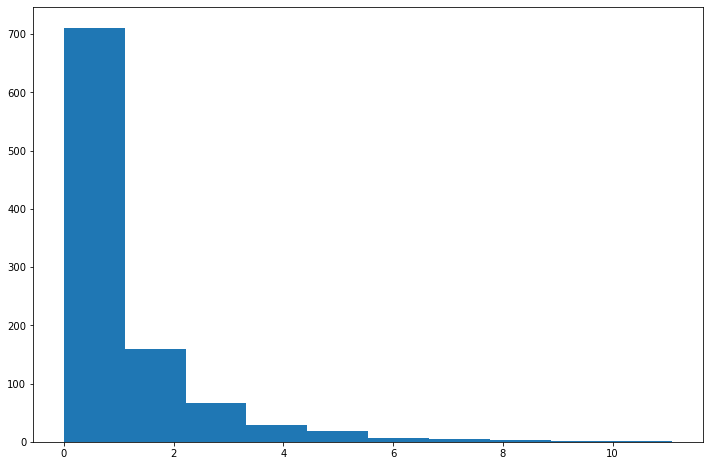

In [49]:
fig,ax = plt.subplots(figsize=(12,8))
ax.hist(chi_squared_values)

On the last screen, our calculated chi-squared value (3728.95 from the survey) is greater than all the values in the distribution, so our <font color='red'>p-value is 0</font>, indicating that our result is <font color='red'>statistically significant</font>. You may recall from the last lesson that .05 is the typical threshold for statistical significance, and anything below it is considered significant.

<font color='blue'>A significant value indicates that there's a difference between the observed and expected values, but it doesn't indicate what is different.</font>

In [54]:
print(f'max value in our distirbution is {np.max(chi_squared_values)}')
print(f'the Chi-Sqaured value from survey is {gender_chisq}')
print('''
This means that our chi-squared value is higher than 100% of all 
the values in the sampling distribution, so we get a p-value of 0. 
This means that there is a 0% chance that we could get such a result 
randomly.
''')

max value in our distirbution is 11.093056110070329
the Chi-Sqaured value from survey is 3728.950615767329

This means that our chi-squared value is higher than 100% of all 
the values in the sampling distribution, so we get a p-value of 0. 
This means that there is a 0% chance that we could get such a result 
randomly.



In [55]:
exp_females=150
exp_males=150
chi_squared_values=[]
for _ in range(0,1000):
    chi_squared_values.append(chi_squared(300))
print(chi_squared_values[:10])

[0.12, 1.92, 1.92, 0.3333333333333333, 0.013333333333333334, 1.92, 0.48, 0.12, 0.0, 0.12]


(array([789., 121.,  57.,  18.,  13.,   0.,   0.,   1.,   0.,   1.]),
 array([ 0.   ,  1.452,  2.904,  4.356,  5.808,  7.26 ,  8.712, 10.164,
        11.616, 13.068, 14.52 ]),
 <BarContainer object of 10 artists>)

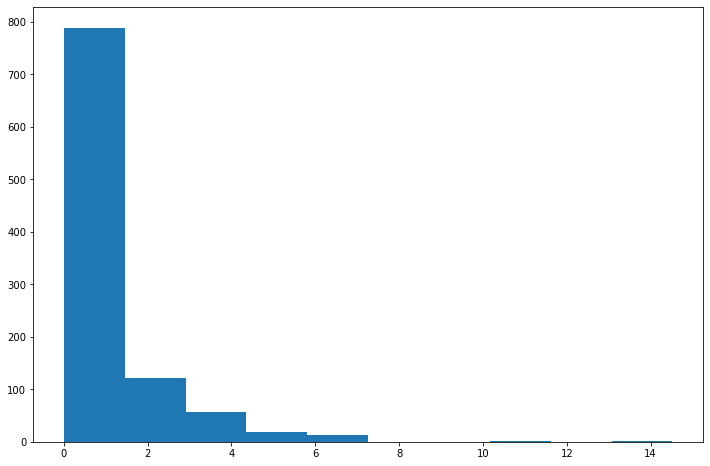

In [56]:
fig,ax=plt.subplots(figsize=(12,8))
ax.hist(chi_squared_values)

When we were computing the chi-squared value earlier, we were working with 2 values that could vary, the number of Males and the number of Females. Only 1 of the values could vary. Since we already know the total number of values, 32561, if we set one of the values, the other has to be the difference between 32561 and the value we set.

A **degree of freedom is the number of values that can vary without the other values being "locked in"**. In the case of our two categories, there is actually only one degree of freedom. Degrees of freedom are an important statistical concept that will come up repeatedly, both in this lesson and after.


So far, we've only calculated chi-squared values for 2 categories and 1 degree of freedom. We can actually work with any number of categories, and any number of degrees of freedom. We can accomplish this using largely the same formula we've been using, but we will need to generate new sampling distributions for each number of degrees of freedom.

In [59]:
df['race'].value_counts(normalize=True)

 White                 0.854274
 Black                 0.095943
 Asian-Pac-Islander    0.031909
 Amer-Indian-Eskimo    0.009551
 Other                 0.008323
Name: race, dtype: float64